In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2_ cargamos los datos y elimino la primera columna al ser inecesaria

In [3]:
df_accidente = pd.read_csv("AccidentesAviones.csv", sep=",")
df_accidente = df_accidente.iloc[:, 1:]
pd.set_option('display.max_columns', None)

3_hacemos una exploración inicial y Visualizamos el dataset

In [4]:
df_accidente.head(5)

,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20,?,?,14,?,?,0,The airship flew into a thunderstorm and encou...


3_a) revisamos dimensiones

In [5]:
df_accidente.shape


(5008, 17)

3_b) revisamos si existen nulos

In [6]:
nulosendataset =  df_accidente.isnull().sum().sum()
nulosporvariable = df_accidente.isnull().sum()
print("Existen ", nulosendataset, "nulo a nivel de dataset")
print("Existen estos nulos por variables:")
print(nulosporvariable)

Existen  0 nulo a nivel de dataset
Existen estos nulos por variables:
fecha                     0
HORA declarada            0
Ruta                      0
OperadOR                  0
flight_no                 0
route                     0
ac_type                   0
registration              0
cn_ln                     0
all_aboard                0
PASAJEROS A BORDO         0
crew_aboard               0
cantidad de fallecidos    0
passenger_fatalities      0
crew_fatalities           0
ground                    0
summary                   0
dtype: int64


3_c) revisamos tipos de datos por cada columna

In [7]:
df_accidente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   fecha                   5008 non-null   object
 1   HORA declarada          5008 non-null   object
 2   Ruta                    5008 non-null   object
 3   OperadOR                5008 non-null   object
 4   flight_no               5008 non-null   object
 5   route                   5008 non-null   object
 6   ac_type                 5008 non-null   object
 7   registration            5008 non-null   object
 8   cn_ln                   5008 non-null   object
 9   all_aboard              5008 non-null   object
 10  PASAJEROS A BORDO       5008 non-null   object
 11  crew_aboard             5008 non-null   object
 12  cantidad de fallecidos  5008 non-null   object
 13  passenger_fatalities    5008 non-null   object
 14  crew_fatalities         5008 non-null   object
 15  grou

4_normalizamos nombres de las columnas

In [8]:
df_accidente = df_accidente.rename(columns={'fecha': 'Fecha'})
df_accidente = df_accidente.rename(columns={'HORA declarada': 'Hora'})
df_accidente = df_accidente.rename(columns={'OperadOR': 'Operador'})
df_accidente = df_accidente.rename(columns={'flight_no': 'N° de Vuelo'})
df_accidente = df_accidente.rename(columns={'Ruta':'Origen-Destino', 'route':'Detalles de Ruta'})
df_accidente = df_accidente.rename(columns={'ac_type': 'Tipo de aeronave accidentada'})
df_accidente = df_accidente.rename(columns={'registration': 'Registro de la Aeronave'})
df_accidente = df_accidente.rename(columns={'cn_ln': 'Linea de produccion'})
df_accidente = df_accidente.rename(columns={'all_aboard': 'Total de personas a bordo'})
df_accidente = df_accidente.rename(columns={'PASAJEROS A BORDO': 'Pasajeros'})
df_accidente = df_accidente.rename(columns={'crew_aboard': 'Tripulacion'})
df_accidente = df_accidente.rename(columns={'cantidad de fallecidos': 'Total de Fallecidos'})
df_accidente = df_accidente.rename(columns={'passenger_fatalities': 'Pasajeros Fallecidos'})
df_accidente = df_accidente.rename(columns={'crew_fatalities': 'Tripulantes Fallecidos'})
df_accidente = df_accidente.rename(columns={'ground': 'Muertos en tierra'})
df_accidente = df_accidente.rename(columns={'summary': 'resumen'})

5_revisamos e intercambiamos los datos que se encuentran como "?"

In [9]:
print("en la columna Fecha hay: ", len(df_accidente[df_accidente["Fecha"] == "?"]), "datos como ?")
print("en la columna Hora hay: ", len(df_accidente[df_accidente["Hora"] == "?"]), "datos como ?")
print("en la columna Origen-Destino hay: ", len(df_accidente[df_accidente["Origen-Destino"] == "?"]), "datos como ?")
print("en la columna Detalles de Ruta hay: ", len(df_accidente[df_accidente["Detalles de Ruta"] == "?"]), "datos como ?")
print("en la columna Operador hay: ", len(df_accidente[df_accidente["Operador"] == "?"]), "datos como ?")
print("en la columna N° de Vuelo hay: ", len(df_accidente[df_accidente["N° de Vuelo"] == "?"]), "datos como ?")
print("en la columna Tipo de aeronave accidentada hay: ", len(df_accidente[df_accidente["Tipo de aeronave accidentada"] == "?"]), "datos como ?")
print("en la columna Registro de la Aeronave hay: ", len(df_accidente[df_accidente["Registro de la Aeronave"] == "?"]), "datos como ?")
print("en la columna Linea de produccion hay: ", len(df_accidente[df_accidente["Linea de produccion"] == "?"]), "datos como ?")
print("en la columna Total de personas a bordo hay: ", len(df_accidente[df_accidente["Total de personas a bordo"] == "?"]), "datos como ?")
print("en la columna Pasajeros hay: ", len(df_accidente[df_accidente["Pasajeros"] == "?"]), "datos como ?")
print("en la columna Tripulacion hay: ", len(df_accidente[df_accidente["Tripulacion"] == "?"]), "datos como ?")
print("en la columna Total de Fallecidos hay: ", len(df_accidente[df_accidente["Total de Fallecidos"] == "?"]), "datos como ?")
print("en la columna Pasajeros Fallecidos hay: ", len(df_accidente[df_accidente["Pasajeros Fallecidos"] == "?"]), "datos como ?")
print("en la columna Tripulantes Fallecidos hay: ", len(df_accidente[df_accidente["Tripulantes Fallecidos"] == "?"]), "datos como ?")
print("en la columna Muertos en tierra hay: ", len(df_accidente[df_accidente["Muertos en tierra"] == "?"]), "datos como ?")
print("en la columna resumen hay: ", len(df_accidente[df_accidente["resumen"] == "?"]), "datos como ?")

en la columna Fecha hay:  0 datos como ?
en la columna Hora hay:  1504 datos como ?
en la columna Origen-Destino hay:  5 datos como ?
en la columna Detalles de Ruta hay:  762 datos como ?
en la columna Operador hay:  10 datos como ?
en la columna N° de Vuelo hay:  3682 datos como ?
en la columna Tipo de aeronave accidentada hay:  13 datos como ?
en la columna Registro de la Aeronave hay:  272 datos como ?
en la columna Linea de produccion hay:  667 datos como ?
en la columna Total de personas a bordo hay:  17 datos como ?
en la columna Pasajeros hay:  221 datos como ?
en la columna Tripulacion hay:  219 datos como ?
en la columna Total de Fallecidos hay:  8 datos como ?
en la columna Pasajeros Fallecidos hay:  235 datos como ?
en la columna Tripulantes Fallecidos hay:  235 datos como ?
en la columna Muertos en tierra hay:  44 datos como ?
en la columna resumen hay:  59 datos como ?


In [10]:
df_accidente['Fecha'] = df_accidente['Fecha'].replace('?', pd.NaT) 
df_accidente['Hora'] = df_accidente['Hora'].replace('?', pd.NaT) 
df_accidente['Origen-Destino'] = df_accidente['Origen-Destino'].replace('?', "Na dato") 
df_accidente['Operador'] = df_accidente['Operador'].replace('?', "Na dato") 
df_accidente['N° de Vuelo'] = df_accidente['N° de Vuelo'].replace('?', "Na dato") 
df_accidente['Detalles de Ruta'] = df_accidente['Detalles de Ruta'].replace('?', "Na dato")
df_accidente['Tipo de aeronave accidentada'] = df_accidente['Tipo de aeronave accidentada'].replace('?', "Na dato") 
df_accidente['Registro de la Aeronave'] = df_accidente['Registro de la Aeronave'].replace('?', "Na dato")
df_accidente['Linea de produccion'] = df_accidente['Linea de produccion'].replace('?', "Na dato") 
df_accidente['Total de personas a bordo'] = df_accidente['Total de personas a bordo'].replace('?', 0) 
df_accidente['Pasajeros'] = df_accidente['Pasajeros'].replace('?', 0) 
df_accidente['Tripulacion'] = df_accidente['Tripulacion'].replace('?', 0) 
df_accidente['Total de Fallecidos'] = df_accidente['Total de Fallecidos'].replace('?', 0) 
df_accidente['Pasajeros Fallecidos'] = df_accidente['Pasajeros Fallecidos'].replace('?', 0)
df_accidente['Tripulantes Fallecidos'] = df_accidente['Tripulantes Fallecidos'].replace('?', 0)
df_accidente['Muertos en tierra'] = df_accidente['Muertos en tierra'].replace('?', 0) 
df_accidente['resumen'] = df_accidente['resumen'].replace('?', "Na dato")

6_convertimos columnas a formatos adecuados

In [11]:
columnas_numericas = ['Total de personas a bordo', 'Pasajeros', 'Tripulacion', 'Total de Fallecidos', 'Pasajeros Fallecidos', 'Tripulantes Fallecidos', 'Muertos en tierra']
df_accidente[columnas_numericas] = df_accidente[columnas_numericas].astype(int)

In [12]:
df_accidente["Hora"] = df_accidente["Hora"].str.replace("c ", "")
df_accidente["Hora"] = pd.to_datetime(df_accidente["Hora"], format="%H%M", errors='coerce').dt.strftime("%H:%M")

In [13]:
df_accidente["Fecha"] = pd.to_datetime(df_accidente["Fecha"], format="%B %d, %Y").dt.strftime("%Y-%m-%d")

7_validamos los nulos

In [14]:
null_counts = df_accidente.isnull().sum()
null_counts

Fecha                              0
Hora                            1721
Origen-Destino                     0
Operador                           0
N° de Vuelo                        0
Detalles de Ruta                   0
Tipo de aeronave accidentada       0
Registro de la Aeronave            0
Linea de produccion                0
Total de personas a bordo          0
Pasajeros                          0
Tripulacion                        0
Total de Fallecidos                0
Pasajeros Fallecidos               0
Tripulantes Fallecidos             0
Muertos en tierra                  0
resumen                            0
dtype: int64

8_estadisticas

In [15]:
df_accidente.describe()

,Total de personas a bordo,Pasajeros,Tripulacion,Total de Fallecidos,Pasajeros Fallecidos,Tripulantes Fallecidos,Muertos en tierra
count,5008.000000,5008.000000,5008.000000,5008.000000,5008.000000,5008.000000,5008.000000
mean,31.015575,25.691294,4.321885,22.258387,18.051917,3.418930,1.703275
std,45.438768,43.405075,3.789422,34.983747,33.496574,3.193296,55.251400
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,2.000000,2.000000,4.000000,0.000000,1.000000,0.000000
50%,16.000000,11.000000,3.000000,11.000000,7.000000,3.000000,0.000000
75%,34.250000,29.000000,6.000000,25.000000,20.000000,5.000000,0.000000
max,644.000000,614.000000,83.000000,583.000000,560.000000,43.000000,2750.000000


In [16]:
# Obtener columnas numéricas
columnas_numericas = df_accidente.select_dtypes(include=[np.number])

# Calcular el rango intercuartílico (IQR) para cada columna numérica
q1 = columnas_numericas.quantile(0.25)
q3 = columnas_numericas.quantile(0.75)
iqr = q3 - q1

# Calcular la mediana (quartil 0.5)
mediana = columnas_numericas.median()

# Definir los límites superior e inferior para detectar outliers
umbral_superior = q3 + 1.5 * iqr
umbral_inferior = q1 - 1.5 * iqr

# Detectar outliers en cada columna numérica
outliers = ((columnas_numericas < umbral_inferior) | (columnas_numericas > umbral_superior))

# Obtener el número de outliers en cada columna
num_outliers = outliers.sum()

# Obtener la cantidad de valores por debajo del mínimo y por encima del máximo para cada columna
valores_por_debajo_min = (columnas_numericas < umbral_inferior).sum()
valores_por_encima_max = (columnas_numericas > umbral_superior).sum()

# Obtener los umbrales mínimo y máximo por columna
umbral_minimo = columnas_numericas.min()
umbral_maximo = columnas_numericas.max()

# Crear una tabla con los resultados
tabla_resultados = pd.DataFrame({
    "Número de outliers": num_outliers,
    "Valores por debajo del mínimo": valores_por_debajo_min,
    "Valores por encima del máximo": valores_por_encima_max,
    "Umbral mínimo": umbral_minimo,
    "Umbral máximo": umbral_maximo,
    "Mediana": mediana
})

# Imprimir la tabla de resultados
print(tabla_resultados)

                           Número de outliers  Valores por debajo del mínimo  \
Total de personas a bordo                 508                              0   
Pasajeros                                 500                              0   
Tripulacion                               151                              0   
Total de Fallecidos                       454                              0   
Pasajeros Fallecidos                      450                              0   
Tripulantes Fallecidos                    122                              0   
Muertos en tierra                         248                              0   

                           Valores por encima del máximo  Umbral mínimo  \
Total de personas a bordo                            508              0   
Pasajeros                                            500              0   
Tripulacion                                          151              0   
Total de Fallecidos                                  454   

In [18]:
tabla_resultados

,Número de outliers,Valores por debajo del mínimo,Valores por encima del máximo,Umbral mínimo,Umbral máximo,Mediana
Total de personas a bordo,508,0,508,0,644,16.0
Pasajeros,500,0,500,0,614,11.0
Tripulacion,151,0,151,0,83,3.0
Total de Fallecidos,454,0,454,0,583,11.0
Pasajeros Fallecidos,450,0,450,0,560,7.0
Tripulantes Fallecidos,122,0,122,0,43,3.0
Muertos en tierra,248,0,248,0,2750,0.0


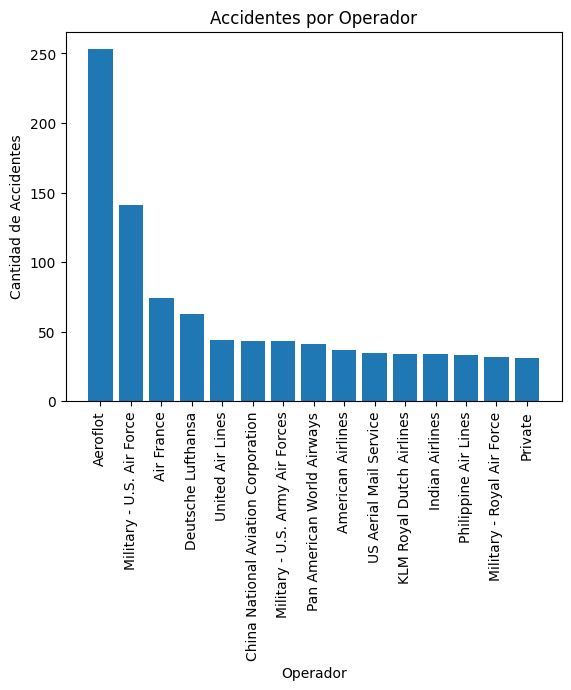

In [26]:
# Seleccionar los datos necesarios
datos_operador = df_accidente['Operador'].value_counts().head(15)

# Obtener los nombres de los operadores y sus respectivas cantidades
nombres_operadores = datos_operador.index.tolist()
cantidades_operadores = datos_operador.values.tolist()

plt.bar(nombres_operadores, cantidades_operadores)
plt.xlabel('Operador')
plt.ylabel('Cantidad de Accidentes')
plt.title('Accidentes por Operador')
plt.xticks(rotation=90)
plt.show()

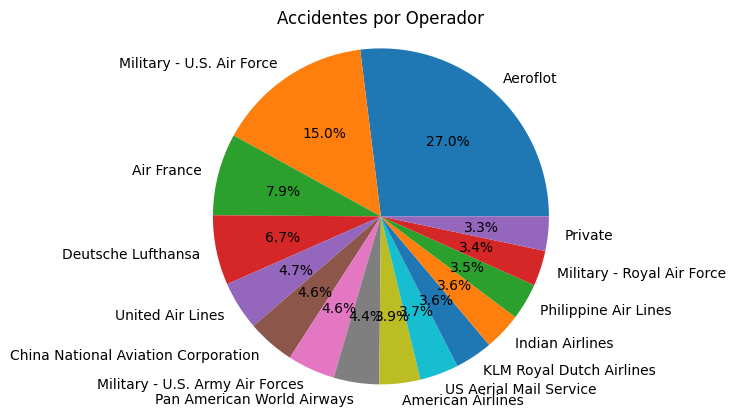

In [27]:
# Crear el gráfico de torta
plt.pie(cantidades_operadores, labels=nombres_operadores, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Accidentes por Operador')
plt.show()

In [31]:
df_accidente['Hora'] = pd.to_datetime(df_accidente['Hora'], format='%H:%M', errors='coerce')

In [32]:
# Agrupar los datos por hora y contar la cantidad de accidentes
accidentes_por_hora = df_accidente['Hora'].dt.hour.value_counts().sort_index()

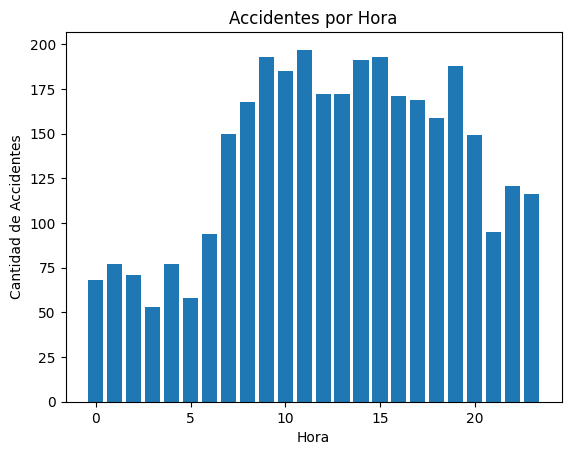

In [33]:
# Crear el gráfico de barras
plt.bar(accidentes_por_hora.index, accidentes_por_hora.values)
plt.xlabel('Hora')
plt.ylabel('Cantidad de Accidentes')
plt.title('Accidentes por Hora')
plt.show()

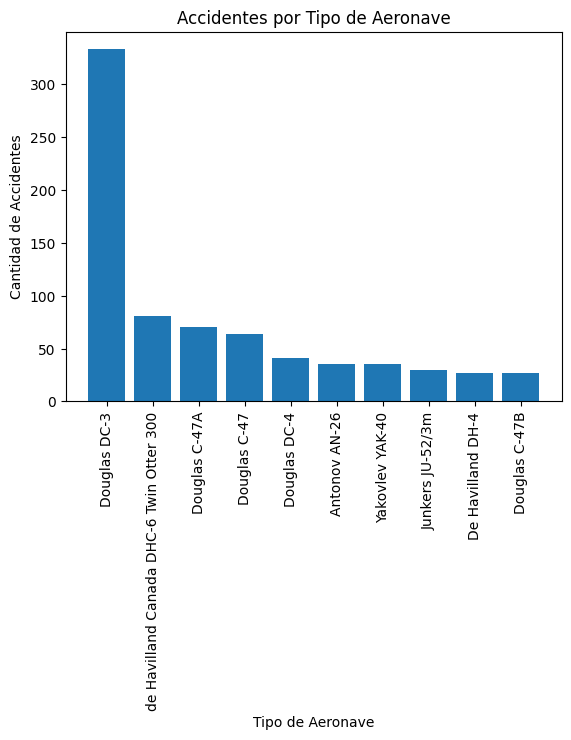

In [34]:
accidentes_por_aeronave = df_accidente['Tipo de aeronave accidentada'].value_counts()
N = 10  # Número de aeronaves más comunes a incluir en el gráfico
accidentes_por_aeronave = accidentes_por_aeronave.head(N)
# Crear el gráfico de barras
plt.bar(accidentes_por_aeronave.index, accidentes_por_aeronave.values)
plt.xlabel('Tipo de Aeronave')
plt.ylabel('Cantidad de Accidentes')
plt.title('Accidentes por Tipo de Aeronave')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.show()

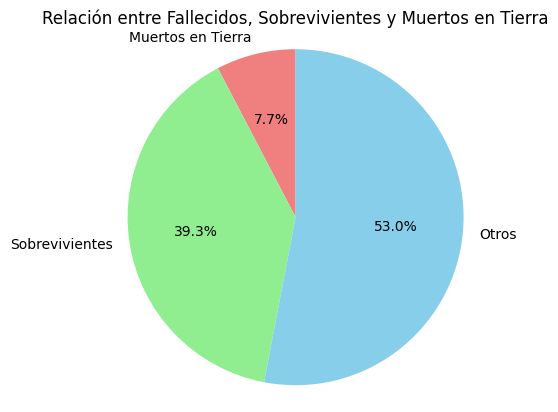

In [42]:
# Obtener el total de personas a bordo, total de fallecidos y muertos en tierra
total_personas_a_bordo = df_accidente['Total de personas a bordo'].sum()
total_fallecidos = df_accidente['Total de Fallecidos'].sum()
muertos_en_tierra = df_accidente['Muertos en tierra'].sum()

# Calcular la cantidad de sobrevivientes
sobrevivientes = total_personas_a_bordo - total_fallecidos

# Calcular el porcentaje de muertos en tierra, sobrevivientes y otros respecto al total de fallecidos
porcentaje_muertos_tierra = (muertos_en_tierra / total_fallecidos) * 100
porcentaje_sobrevivientes = (sobrevivientes / total_fallecidos) * 100
porcentaje_otros = 100 - porcentaje_muertos_tierra - porcentaje_sobrevivientes

# Crear una lista con los valores
valores = [porcentaje_muertos_tierra, porcentaje_sobrevivientes, porcentaje_otros]

# Etiquetas para las categorías
categorias = ['Muertos en Tierra', 'Sobrevivientes', 'Otros']

# Colores para las categorías
colores = ['lightcoral', 'lightgreen', 'skyblue']

# Crear el gráfico de torta
plt.pie(valores, labels=categorias, colors=colores, autopct='%1.1f%%', startangle=90)

# Ajustar el aspecto del gráfico
plt.axis('equal')
plt.title('Relación entre Fallecidos, Sobrevivientes y Muertos en Tierra')

# Mostrar el gráfico
plt.show()

In [44]:
df_accidente.head(5)

,Fecha,Hora,Origen-Destino,Operador,N° de Vuelo,Detalles de Ruta,Tipo de aeronave accidentada,Registro de la Aeronave,Linea de produccion,Total de personas a bordo,Pasajeros,Tripulacion,Total de Fallecidos,Pasajeros Fallecidos,Tripulantes Fallecidos,Muertos en tierra,resumen
0,1908-09-17,1900-01-01 17:18:00,"Fort Myer, Virginia",Military - U.S. Army,Na dato,Demonstration,Wright Flyer III,Na dato,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1909-09-07,NaT,"Juvisy-sur-Orge, France",Na dato,Na dato,Air show,Wright Byplane,SC1,Na dato,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,1912-07-12,1900-01-01 06:30:00,"Atlantic City, New Jersey",Military - U.S. Navy,Na dato,Test flight,Dirigible,Na dato,Na dato,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,1913-08-06,NaT,"Victoria, British Columbia, Canada",Private,Na dato,Na dato,Curtiss seaplane,Na dato,Na dato,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,1913-09-09,1900-01-01 18:30:00,Over the North Sea,Military - German Navy,Na dato,Na dato,Zeppelin L-1 (airship),Na dato,Na dato,20,0,0,14,0,0,0,The airship flew into a thunderstorm and encou...


In [46]:
columnas = ["Fecha","Operador", "Detalles de Ruta", "Tipo de aeronave accidentada", "Pasajeros", 
            "Tripulacion", "Pasajeros Fallecidos","Tripulantes Fallecidos","Muertos en tierra", "Total de personas a bordo"]
df_accidentepower = pd.DataFrame(df_accidente[columnas])
df_accidentepower.to_csv('df_accidentepower.csv')